In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder ,StandardScaler

from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_metrix ,classification_report ,precision_score
#or
from sklearn  import metrics
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
voices=pd.read_csv("/content/voice-classification.csv")

In [ ]:
voices

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
voices.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
voices.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
voices.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [ ]:
# AS WE CAN SEE FROM DESCRIPTIVE STATISTICS ,WE NEED TO SCLAE DATA BEFORE SPLITING

In [ ]:
X=voices.drop("label",axis=1)
Y=voices['label']

In [ ]:
X.shape,Y.shape

((3168, 20), (3168,))

**scalling independent variable**

In [ ]:
scaler=StandardScaler()

In [ ]:
x_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,2.870880e-16,1.000158,-4.731813,-0.576485,0.131441,0.609747,2.347370
sd,3168.0,7.177199e-17,1.000158,-2.328145,-0.911277,0.121874,0.594275,3.492409
median,3168.0,-1.256010e-16,1.000158,-4.803987,-0.440886,0.121353,0.687604,2.079633
Q25,3168.0,-3.588600e-17,1.000158,-2.881056,-0.603408,-0.003476,0.729026,2.196155
Q75,3168.0,-1.103494e-15,1.000158,-7.692595,-0.677723,0.038893,0.799454,2.060643
IQR,3168.0,1.435440e-16,1.000158,-1.630614,-0.975999,0.233087,0.698184,3.925441
skew,3168.0,-7.850062e-17,1.000158,-0.707201,-0.351568,-0.222429,-0.049170,7.449607
kurt,3168.0,0.000000e+00,1.000158,-0.255731,-0.229038,-0.209403,-0.169891,9.436434
sp.ent,3168.0,2.512020e-15,1.000158,-3.479385,-0.740811,0.147641,0.746822,1.931618
sfm,3168.0,-2.870880e-16,1.000158,-2.092137,-0.846094,-0.066939,0.706843,2.449219


In [ ]:
Y

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [ ]:
Y=Y.replace('female',0)

In [ ]:
Y=Y.replace('male',1)

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

<AxesSubplot:xlabel='label', ylabel='meanfreq'>

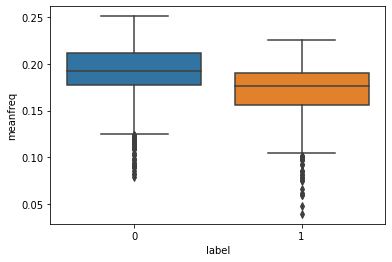

In [ ]:
sns.boxplot(Y,X.iloc[:,0])

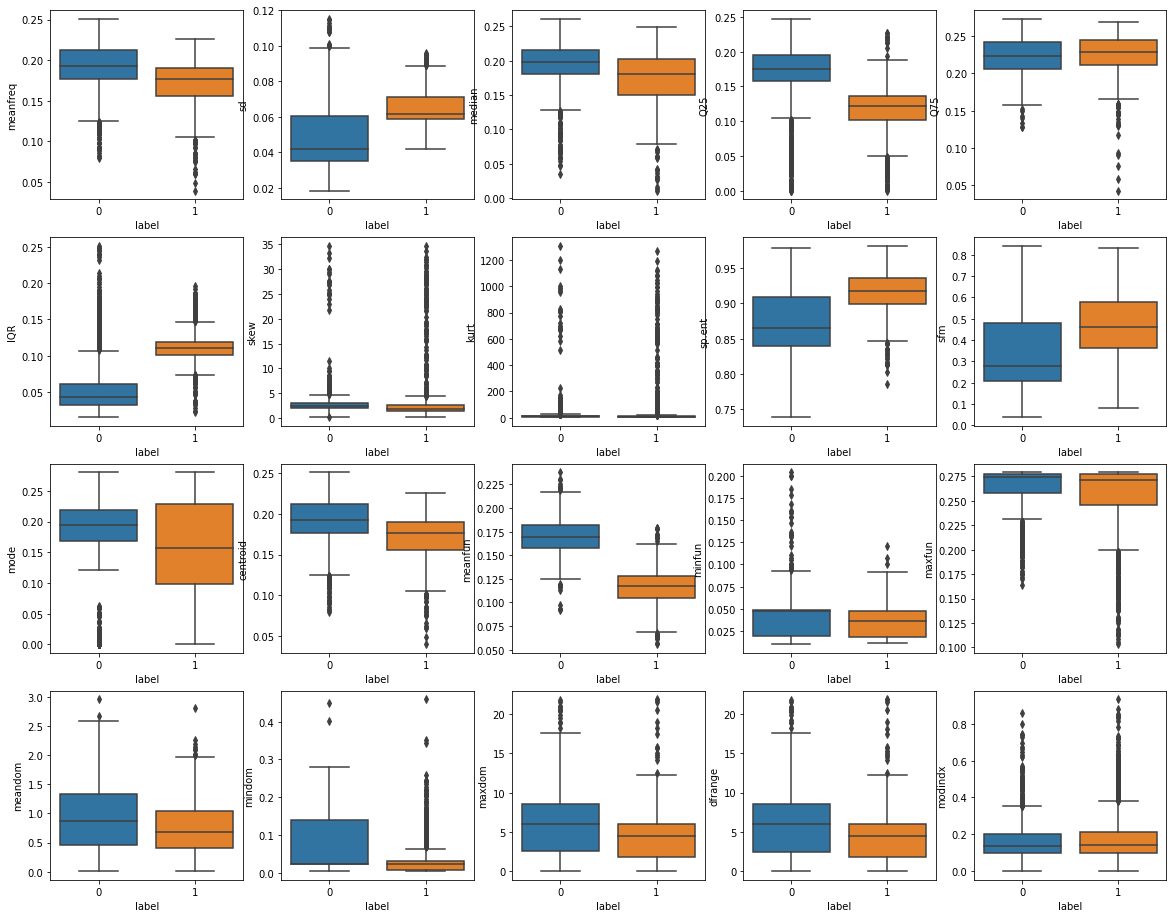

In [ ]:
plt.figure(figsize=(20,16))
for i in range(20):
   plt.subplot(4,5,i+1)
   sns.boxplot(Y,X.iloc[:,i])


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x_scaled,Y,test_size=0.3)

In [ ]:
train_x.shape ,test_x.shape,train_y.shape,test_y.shape

((2217, 20), (951, 20), (2217,), (951,))

**Building Logistic Regression Model**

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(train_x,train_y)

LogisticRegression()

In [ ]:
print("train score: {}".format(log_reg.score(train_x,train_y)))
print("test score: {}".format(log_reg.score(test_x,test_y)))

train score: 0.9788001804239964
test score: 0.9663512092534174


**Another method for accuracy but it compare predict and actual**

In [ ]:
print("train_score: {}".format(metrics.accuracy_score(train_y,log_reg.predict(train_x))))
print("train_score: {}".format(metrics.accuracy_score(test_y,log_reg.predict(test_x))))

train_score: 0.9788001804239964
train_score: 0.9663512092534174


<AxesSubplot:>

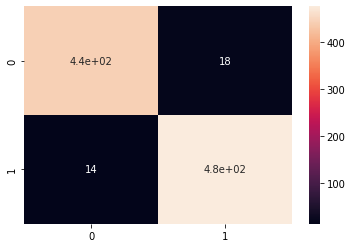

In [ ]:
sns.heatmap(metrics.confusion_matrix(test_y,log_reg.predict(test_x)),annot=True)

<AxesSubplot:>

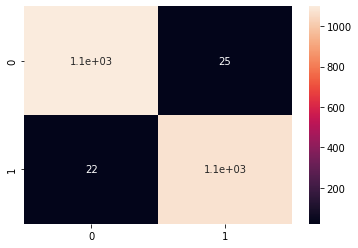

In [ ]:
sns.heatmap(metrics.confusion_matrix(train_y,log_reg.predict(train_x)),annot=True)

In [ ]:
print(metrics.classification_report(train_y,log_reg.predict(train_x)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1123
           1       0.98      0.98      0.98      1094

    accuracy                           0.98      2217
   macro avg       0.98      0.98      0.98      2217
weighted avg       0.98      0.98      0.98      2217



In [ ]:
print(metrics.classification_report(test_y,log_reg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       461
           1       0.96      0.97      0.97       490

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

